### Notebook to plot the reconstructed spectrum for data and MC

In [28]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import plotting_functions
import importlib
import fitting
def get_charge(filepath):
    f = h5py.File(filepath, 'r')
    return np.array(f['clusters'][(f['clusters']['nhit'] <= 15)]['q'])
    #return np.array(f['clusters']['q'])
    #return np.array(f['clusters_hits']['q'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
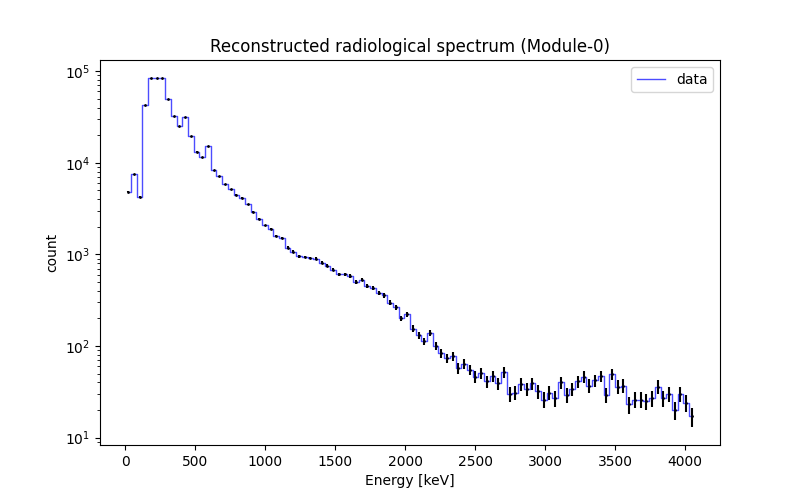

In [29]:
importlib.reload(plotting_functions)
importlib.reload(fitting)
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(8,5))

# general parameters
do_calibration = True
normalization = None
nbins =200
recomb_filename = '../../bin/NEST_R-values_efield_500_1_keV_to_20000_keV_1_keV_stepsize.h5'

# plot data histogram
charge_data = get_charge('/sdf/group/neutrino/sfogarty/ND_prototype_files/charge_data/module-1/light_study/packet_2022_02_08_01_47_59_CET_clusters_test_test.h5')

bin_centers_data, bin_contents_data, bin_error_data = \
        plotting_functions.get_hist_data(charge_data, bins=nbins, data_type='data', \
        calibrate=do_calibration, recomb_filename=recomb_filename)

# number of files for each decay. Assuming they all have the same number of events
nFiles = 1
nFiles_dict = {
    '39Ar_betas': nFiles,
    '85Kr_betas': nFiles,
    '85Kr_gammas': nFiles,
    '40K_betas': nFiles,
    '40K_gammas': nFiles,
    '60Co_betas': nFiles,
    '60Co_gammas': nFiles,
    '232Th_betas': nFiles,
    '232Th_gammas': nFiles,
    '232Th_alphas': nFiles,
    '238U_betas': nFiles,
    '238U_gammas': nFiles,
    '238U_alphas': nFiles
}

# Colors for each isotope
colors = {
    '39Ar_betas': 'b',
    '85Kr': 'g',
    '60Co': 'r',
    '40K': 'c',
    '232Th': 'm',
    '238U': 'y'
}

folder = '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/radiologicals_cachedLArNEST/reco/'
#folder = '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/radiologicals_6e3ke-threshold_gaussian_sigma500_cachedLArNEST/reco/'
folders_MC = {
    #'39Ar_betas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/radiologicals_6e3ke-threshold_gaussian_sigma500_cachedLArNEST/reco/',
    '39Ar_betas': folder,
    '85Kr_betas': folder,
    '85Kr_gammas': folder,
    '40K_betas': folder,
    '40K_gammas': folder,
    '60Co_betas': folder,
    '60Co_gammas': folder,
    #'232Th_betas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/radiologicals_disabledChannels/reco/',
    #'232Th_gammas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/radiologicals_disabledChannels/reco/',
    #'232Th_alphas': '/sdf/group/neutrino/sfogarty/ND_prototype_files/MC/module-0/radiologicals_disabledChannels/reco/',
    '232Th_betas': folder,
    '232Th_gammas': folder,
    '232Th_alphas': folder,
    '238U_betas': folder,
    '238U_gammas': folder,
    '238U_alphas': folder
}

ending = 'clusters'
filename_ending_MC = {
    '39Ar_betas': ending,
    '85Kr_betas': ending,
    '85Kr_gammas': ending,
    '40K_betas': ending,
    '40K_gammas': ending,
    '60Co_betas': ending,
    '60Co_gammas': ending,
    '232Th_betas': ending,
    '232Th_gammas': ending,
    '232Th_alphas': ending,
    '238U_betas': ending,
    '238U_gammas': ending,
    '238U_alphas': ending
}

dont_plot_errorbars = False

plotting_functions.plot_hist(bin_centers_data, bin_contents_data, bin_error_data, axes, color='b', linewidth=1, \
                             label='data',linestyle='-', norm=normalization, dont_plot_errorbars=dont_plot_errorbars)

do_not_plot_list = ['85Kr', '60Co', '40K', '232Th', '238U','39Ar']
do_not_plot_list = []
disable_betas = False
disable_gammas = False
disable_alphas = False
charge_dict, hist_data_dict = plotting_functions.get_charge_MC(nFiles_dict, folders_MC, filename_ending_MC, nbins, do_calibration, recomb_filename, \
                                                               disable_betas=disable_betas, disable_gammas=disable_gammas, disable_alphas=disable_alphas)

#np.savez('module0_data_spectrum.npz',x=bin_centers_data, y=bin_contents_data)


adjust_MC = False
adjustments = [1,1,1,1,1e2,1e2]
if adjust_MC:
    hist_data_dict['39Ar_betas']['bin_contents'] = (hist_data_dict['39Ar_betas']['bin_contents'] * adjustments[0]).astype('int64')
    hist_data_dict['85Kr']['bin_contents'] = (hist_data_dict['85Kr']['bin_contents'] * adjustments[1]).astype('int64')
    hist_data_dict['40K']['bin_contents'] = (hist_data_dict['40K']['bin_contents'] * adjustments[2]).astype('int64')
    hist_data_dict['60Co']['bin_contents'] = (hist_data_dict['60Co']['bin_contents'] * adjustments[3]).astype('int64')
    hist_data_dict['232Th']['bin_contents'] = (hist_data_dict['232Th']['bin_contents'] * adjustments[4]).astype('int64')
    hist_data_dict['238U']['bin_contents'] = (hist_data_dict['238U']['bin_contents'] * adjustments[5]).astype('int64')
    
    hist_data_dict['39Ar_betas']['bin_error'] = (hist_data_dict['39Ar_betas']['bin_error'] * adjustments[0]).astype('int64')
    hist_data_dict['85Kr']['bin_error'] = (hist_data_dict['85Kr']['bin_error'] * adjustments[1]).astype('int64')
    hist_data_dict['40K']['bin_error'] = (hist_data_dict['40K']['bin_error'] * adjustments[2]).astype('int64')
    hist_data_dict['60Co']['bin_error'] = (hist_data_dict['60Co']['bin_error'] * adjustments[3]).astype('int64')
    hist_data_dict['232Th']['bin_error'] = (hist_data_dict['232Th']['bin_error'] * adjustments[4]).astype('int64')
    hist_data_dict['238U']['bin_error'] = (hist_data_dict['238U']['bin_error'] * adjustments[5]).astype('int64')
    
argon39 = hist_data_dict['39Ar_betas']['bin_contents']
krypton85 = hist_data_dict['85Kr']['bin_contents']
potassium40 = hist_data_dict['40K']['bin_contents']
cobalt60 = hist_data_dict['60Co']['bin_contents']
thorium232 = hist_data_dict['232Th']['bin_contents']
uranium238 = hist_data_dict['238U']['bin_contents']
    
lower_bound = 3
upper_bound = 1000
do_multicomponent_fit = False
if do_multicomponent_fit:
    bin_centers_mask = (bin_centers_data >= lower_bound) & (bin_centers_data <= upper_bound)
    #factors = fitting.multicomponent_fit(bin_contents_data[bin_centers_mask], \
    #                          argon39[bin_centers_mask], krypton85[bin_centers_mask], \
    #                          potassium40[bin_centers_mask], cobalt60[bin_centers_mask])#, \
    #                          #thorium232[bin_centers_mask], uranium238[bin_centers_mask])
    
    factors, (A_val, B_val) = fitting.multicomponent_fit_with_powerlaw(bin_contents_data[bin_centers_mask], \
                              argon39[bin_centers_mask], krypton85[bin_centers_mask], \
                              potassium40[bin_centers_mask], cobalt60[bin_centers_mask], \
                              thorium232[bin_centers_mask], uranium238[bin_centers_mask], \
                              bin_centers=bin_centers_data[bin_centers_mask], A_init=1e6, B_init=1.0, tol=1e-8, max_iter=150)
    
    print(factors)
    print(A_val, B_val)

    hist_data_dict['39Ar_betas']['bin_contents'] = (hist_data_dict['39Ar_betas']['bin_contents'] * factors[0]).astype('int64')
    hist_data_dict['85Kr']['bin_contents'] = (hist_data_dict['85Kr']['bin_contents'] * factors[1]).astype('int64')
    hist_data_dict['40K']['bin_contents'] = (hist_data_dict['40K']['bin_contents'] * factors[2]).astype('int64')
    hist_data_dict['60Co']['bin_contents'] = (hist_data_dict['60Co']['bin_contents'] * factors[3]).astype('int64')
    hist_data_dict['232Th']['bin_contents'] = (hist_data_dict['232Th']['bin_contents'] * factors[4]).astype('int64')
    hist_data_dict['238U']['bin_contents'] = (hist_data_dict['238U']['bin_contents'] * factors[5]).astype('int64')

    hist_data_dict['39Ar_betas']['bin_error'] = (hist_data_dict['39Ar_betas']['bin_error'] * factors[0]).astype('int64')
    hist_data_dict['85Kr']['bin_error'] = (hist_data_dict['85Kr']['bin_error'] * factors[1]).astype('int64')
    hist_data_dict['40K']['bin_error'] = (hist_data_dict['40K']['bin_error'] * factors[2]).astype('int64')
    hist_data_dict['60Co']['bin_error'] = (hist_data_dict['60Co']['bin_error'] * factors[3]).astype('int64')
    hist_data_dict['232Th']['bin_error'] = (hist_data_dict['232Th']['bin_error'] * factors[4]).astype('int64')
    hist_data_dict['238U']['bin_error'] = (hist_data_dict['238U']['bin_error'] * factors[5]).astype('int64')

do_not_plot_list=['39Ar','85Kr','238U','40K','60Co', '232Th']
#do_not_plot_list=[]
plotting_functions.plot_isotopes(hist_data_dict, axes, colors, norm=normalization, linewidth=2,do_not_plot_list=do_not_plot_list)
#axes.plot(bin_centers_data[bin_centers_mask], fitting.power_law(bin_centers_data[bin_centers_mask], A_val, B_val), 'y-',label=r'Power law fit, $Ax^{-B}$' + f'\n A = {A_val:.1f}, B = {B_val:.4f}')

if do_calibration:
    axes.set_xlabel('Energy [keV]')
else:
    axes.set_xlabel('Charge [mV]')
axes.set_yscale('log')
#axes.set_xscale('log')
#axes.set_ylim(1e-6, 1)
#axes.set_xlim(0,2000)
axes.set_ylabel('count')
axes.set_title('Reconstructed radiological spectrum (Module-0)')
axes.legend()

#plt.savefig('reco_spectrum_data.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
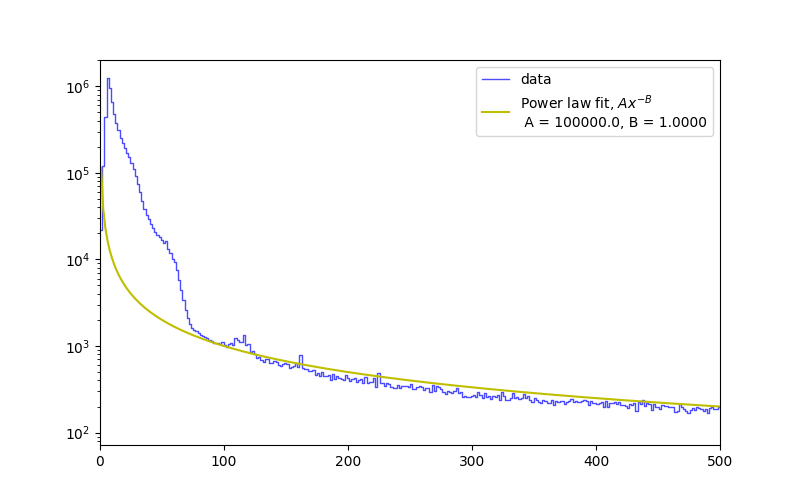

In [91]:
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(8,5))
A_val = 1e5
B_val = 1
plotting_functions.plot_hist(bin_centers_data, bin_contents_data, bin_error_data, axes, color='b', linewidth=1, \
                             label='data',linestyle='-', norm=normalization, dont_plot_errorbars=dont_plot_errorbars)
axes.plot(bin_centers_data, fitting.power_law(bin_centers_data, A_val, B_val), 'y-',label=r'Power law fit, $Ax^{-B}$' + f'\n A = {A_val:.1f}, B = {B_val:.4f}')
axes.legend()
axes.set_xlim(0,500)
axes.set_yscale('log')

(200.0, 3000.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
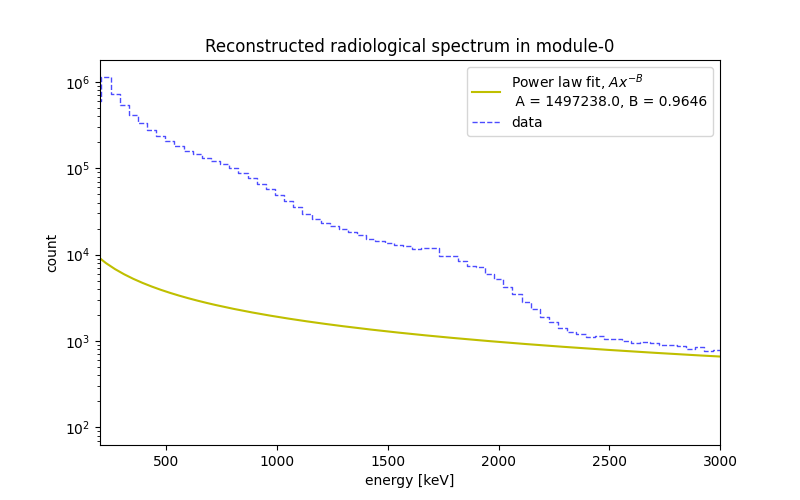

In [28]:
%matplotlib widget
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(8,5))
axes.plot(bin_centers_data, power_law_fit_y, 'y-', label=r'Power law fit, $Ax^{-B}$' + f'\n A = {popt[0]:.1f}, B = {popt[1]:.4f}')
plotting_functions.plot_hist(bin_centers_data, bin_contents_data, bin_error_data, axes, color='b', linewidth=1, \
                             label='data',linestyle='--', norm=normalization, dont_plot_errorbars=dont_plot_errorbars)
axes.set_yscale('log')
axes.set_xlabel('energy [keV]')
axes.set_ylabel('count')
axes.legend()
axes.set_title('Reconstructed radiological spectrum in module-0')
axes.set_xlim(200, 3000)